# Notebook para realizar as análises dos algoritmos

- Thiago Martin Poppe
- Matrícula: 2017014324

In [10]:
from TSP_functions import *

import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import time

In [36]:
def get_info(points, tsp_func, dist_type):
    if dist_type == 'euclidian':
        edges = get_euclidian_distance(points)
    elif dist_type == 'manhattan':
        edges = get_manhattan_distance(points)
    
    G = nx.Graph()
    G.add_weighted_edges_from(edges)
    
    start = time.time()
    _, length = tsp_func(G)
    end = time.time()

    return length, (end - start) / 60

In [37]:
with open('data.csv', 'w') as f:
    f.write('tsp_func,num_verts,length,time,dist_type\n')

    for i in range(4, 11):
        print('*** Fazendo instância de tamanho 2^{} ***'.format(i))
        points = generate_points(size=i)
        
        # Calculando as respostas para o Twice around the tree
        print('*** Calculando para distância Euclidiana (Twice around the tree) ***')
        length, _time = get_info(points, twice_around_the_tree, 'euclidian')
        f.write('{},{},{},{},{}\n'.format('Twice around the tree', 2**i, length, _time, 'Euclidian'))

        print('*** Calculando para distância de Manhattan (Twice around the tree) ***')
        length, _time = get_info(points, twice_around_the_tree, 'manhattan')
        f.write('{},{},{},{},{}\n'.format('Twice around the tree', 2**i, length, _time, 'Manhattan'))

        # Calculando as respostas para o algoritmo de Christofides
        print('*** Calculando para distância Euclidiana (Christofides) ***')
        length, _time = get_info(points, christofides, 'euclidian')
        f.write('{},{},{},{},{}\n'.format('Christofides', 2**i, length, _time, 'Euclidian'))

        print('*** Calculando para distância de Manhattan (Christofides) ***', end='\n\n')
        length, _time = get_info(points, christofides, 'manhattan')
        f.write('{},{},{},{},{}\n'.format('Christofides', 2**i, length, _time, 'Manhattan'))

*** Fazendo instância de tamanho 2^4 ***
*** Calculando para distância Euclidiana (Twice around the tree) ***
*** Calculando para distância de Manhattan (Twice around the tree) ***
*** Calculando para distância Euclidiana (Christofides) ***
*** Calculando para distância de Manhattan (Christofides) ***

*** Fazendo instância de tamanho 2^5 ***
*** Calculando para distância Euclidiana (Twice around the tree) ***
*** Calculando para distância de Manhattan (Twice around the tree) ***
*** Calculando para distância Euclidiana (Christofides) ***
*** Calculando para distância de Manhattan (Christofides) ***

*** Fazendo instância de tamanho 2^6 ***
*** Calculando para distância Euclidiana (Twice around the tree) ***
*** Calculando para distância de Manhattan (Twice around the tree) ***
*** Calculando para distância Euclidiana (Christofides) ***
*** Calculando para distância de Manhattan (Christofides) ***

*** Fazendo instância de tamanho 2^7 ***
*** Calculando para distância Euclidiana (Twice

In [2]:
df = pd.read_csv('data.csv')
df

,tsp_func,num_vertes,length,time,dist_type
0,Twice around the tree,16,446.834453,0.000083,euclidian
1,Twice around the tree,16,562.000000,0.000083,manhattan
2,Christofides,16,394.555962,0.000765,euclidian
3,Christofides,16,444.000000,0.000132,manhattan
4,Twice around the tree,32,579.598540,0.000283,euclidian
5,Twice around the tree,32,646.000000,0.000249,manhattan
6,Christofides,32,489.650891,0.001994,euclidian
7,Christofides,32,632.000000,0.001679,manhattan
8,Twice around the tree,64,829.610676,0.000814,euclidian
9,Twice around the tree,64,1052.000000,0.000748,manhattan


In [7]:
tatt = df[df['tsp_func'] == 'Twice around the tree']
chri = df[df['tsp_func'] == 'Christofides']

In [8]:
tatt_time_euclidian = tatt[tatt[' dist_type'] == ' euclidian'][' time']
chri_time_euclidian = chri[chri[' dist_type'] == ' euclidian'][' time']

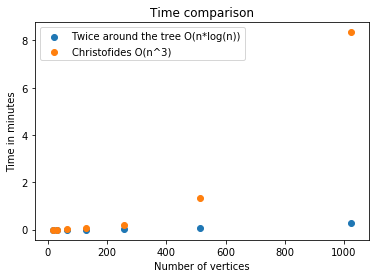

In [39]:
plt.title('Time comparison')
plt.xlabel('Number of vertices')
plt.ylabel('Time in minutes')

plt.scatter([2**i for i in range(4, 11)], tatt_time_euclidian, label='Twice around the tree O(n*log(n))')
plt.scatter([2**i for i in range(4, 11)], chri_time_euclidian, label='Christofides O(n^3)')
plt.legend()

plt.show()